<h1 style="text-align:center">Trabajo Final - Primer Bimestre</h1>
***
* **Manejo y Visualización de Datos con Python**
***
Para la realización del presente trabajo se llevo a cabo la obtención de los datos estadísticos enfocados en el tema de **Hombres y Mujeres en el Ecuador** extraidos de [Ecuador en Cifras](http://www.ecuadorencifras.gob.ec/estadisticas/).

Librerías en python a utilizar: **jupyter, pandas, bokeh.**

Autores : **Jorge Hurtado - Jonathan Rosero**


In [1]:
# Se inicia con la importacion de pandas con un respectivo alias para facilitar su llamada
import pandas as pd

In [2]:
# Con el uso de ".read_csv" lemos el archivo con lo datos extraidos de EcuadorEnCifras
pd.read_csv('./data/ANALFABETISMO_POR_AREA_Y_GRUPOS_DE_EDAD.csv')

,GRANDES_GRUPOS_DE_EDAD,A_URBANA_M,A_URBANA_H,A_RURAL_M,A_RURAL_H,TOTAL_M,TOTAL_H
0,15-24 años,0.009,0.012,0.025,0.028,0.015,0.018
1,25-39 años,0.017,0.018,0.056,0.053,0.030,0.030
2,40-64 años,0.054,0.038,0.205,0.134,0.104,0.072
3,65 años y mas,0.195,0.128,0.497,0.343,0.316,0.224
4,Total nacional,0.043,0.031,0.142,0.103,0.077,0.058


In [3]:
# Como se va ha trabajar con el con los datos presentados anteriomente los guardamos en una variable
tabla1 = pd.read_csv('./data/ANALFABETISMO_POR_AREA_Y_GRUPOS_DE_EDAD.csv')

In [4]:
# Cabe mencionar el tipo de objeto de "tabla1" por lo que usaremos los atributos y metodos para explorar entre los datos
type(tabla1)

pandas.core.frame.DataFrame

In [5]:
# Pandas nos permite trabajar con subconjunto en caso de tener una tabla dividida bajo ciertos parametros
tabla1[['GRANDES_GRUPOS_DE_EDAD', 'A_URBANA_M', 'A_URBANA_H']]

,GRANDES_GRUPOS_DE_EDAD,A_URBANA_M,A_URBANA_H
0,15-24 años,0.009,0.012
1,25-39 años,0.017,0.018
2,40-64 años,0.054,0.038
3,65 años y mas,0.195,0.128
4,Total nacional,0.043,0.031


In [6]:
# A la vez que podemso buscar un dato en especifico
tabla1.loc[tabla1.GRANDES_GRUPOS_DE_EDAD == '40-64 años']

,GRANDES_GRUPOS_DE_EDAD,A_URBANA_M,A_URBANA_H,A_RURAL_M,A_RURAL_H,TOTAL_M,TOTAL_H
2,40-64 años,0.054,0.038,0.205,0.134,0.104,0.072


In [7]:
# También podemos utilizar funciones propias de pandas, en este caso sacamos la media con el uso de ".mean()"
mediaUrbanaM = tabla1.A_URBANA_M.mean()
mediaUrbanaM

0.0636

In [8]:
# Podemos agrupar los datos por columnas
tabla1.groupby('GRANDES_GRUPOS_DE_EDAD')['TOTAL_M'].mean()

GRANDES_GRUPOS_DE_EDAD
15-24 años        0.015
25-39 años        0.030
40-64 años        0.104
65 años y mas     0.316
Total nacional    0.077
Name: TOTAL_M, dtype: float64

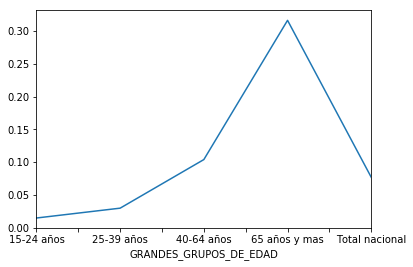

In [9]:
# Por parte de pandas sugiere la presentacion de los datos tras es uso de matplotlib
import matplotlib.pyplot

%matplotlib inline

gytle = tabla1.groupby('GRANDES_GRUPOS_DE_EDAD')['TOTAL_M'].mean()

gytle.plot()

In [10]:
# Importamos la libreria de bokeh para presentar los datos leidos por pandas
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource

# Llamamos a output_notebook para mostrar mostrar los resultanos en el cuaderno de jupyter
output_notebook()

Loading BokehJS ...

In [11]:
# Agrupamos los valores en base a la columna "GRANDES_GRUPOS_DE_EDAD" 
group1 = tabla1.groupby('GRANDES_GRUPOS_DE_EDAD')

# Nos permite obtener Mapas de nombres columnas, secuencias, matrices.
source = ColumnDataSource(group1)

# Creamos un objeto de figura
gph = figure(
    plot_height=250, plot_width=750, # Establecemos el tamaño
    x_range=group1,  # Establecemos el rango de x
    title='ANALFABETISMO POR AREA Y GRUPOS DE EDAD' # Establecemos un titulo para la grafica 
)

# Establecemos que vamos ha mostrar los datos en forma de barras y establecemos los ejes x,y 
gph.vbar(x='GRANDES_GRUPOS_DE_EDAD', top='A_URBANA_H_mean', width=1, line_color="white", source=source)

gph.xgrid.grid_line_color = None
gph.xaxis.axis_label = "AREA URBANA - HOMBRES"
# Modificamos para la presentación el rango inicial 
gph.y_range.start = 0

show(gph)

In [34]:
# Agrupamos los valores en base a la columna "GRANDES_GRUPOS_DE_EDAD" 
group1 = tabla1.groupby('GRANDES_GRUPOS_DE_EDAD')

# Nos permite obtener Mapas nombres de columnas a secuencias o matrices.
source = ColumnDataSource(group1)

# Creamos un objeto de figura y establecemos su tamaño, rango, y le damos un título 
p = figure(plot_height=250, plot_width=750, x_range=group1,  title='ANALFABETISMO POR AREA Y GRUPOS DE EDAD')


p.line(x='GRANDES_GRUPOS_DE_EDAD', y='A_URBANA_M_mean', color='#FF69B4', source=source)

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "AREA URBANA - MUJERES"
# Modificamos para la presentación el rango inicial 
p.y_range.start = 0

show(p)

In [13]:
# Agrupamos los valores en base a la columna "GRANDES_GRUPOS_DE_EDAD" 
group1 = tabla1.groupby('GRANDES_GRUPOS_DE_EDAD')

# Nos permite obtener Mapas nombres de columnas a secuencias o matrices.
source = ColumnDataSource(group1)

# Mostramos los nombres de los datos albergados en source - donde buscamos los nombre de los datos que buscamos en concreto
source.data

{'A_RURAL_H_25%': array([ 0.028,  0.053,  0.134,  0.343,  0.103]),
 'A_RURAL_H_50%': array([ 0.028,  0.053,  0.134,  0.343,  0.103]),
 'A_RURAL_H_75%': array([ 0.028,  0.053,  0.134,  0.343,  0.103]),
 'A_RURAL_H_count': array([ 1.,  1.,  1.,  1.,  1.]),
 'A_RURAL_H_max': array([ 0.028,  0.053,  0.134,  0.343,  0.103]),
 'A_RURAL_H_mean': array([ 0.028,  0.053,  0.134,  0.343,  0.103]),
 'A_RURAL_H_min': array([ 0.028,  0.053,  0.134,  0.343,  0.103]),
 'A_RURAL_H_std': array([ nan,  nan,  nan,  nan,  nan]),
 'A_RURAL_M_25%': array([ 0.025,  0.056,  0.205,  0.497,  0.142]),
 'A_RURAL_M_50%': array([ 0.025,  0.056,  0.205,  0.497,  0.142]),
 'A_RURAL_M_75%': array([ 0.025,  0.056,  0.205,  0.497,  0.142]),
 'A_RURAL_M_count': array([ 1.,  1.,  1.,  1.,  1.]),
 'A_RURAL_M_max': array([ 0.025,  0.056,  0.205,  0.497,  0.142]),
 'A_RURAL_M_mean': array([ 0.025,  0.056,  0.205,  0.497,  0.142]),
 'A_RURAL_M_min': array([ 0.025,  0.056,  0.205,  0.497,  0.142]),
 'A_RURAL_M_std': array([ nan

In [22]:
# Agrupamos los valores en base a la columna "GRANDES_GRUPOS_DE_EDAD" 
group1 = tabla1.groupby('GRANDES_GRUPOS_DE_EDAD')

# Nos permite obtener Mapas nombres de columnas a secuencias o matrices.
source = ColumnDataSource(group1)

# Creamos un objeto de figura y establecemos su tamaño, rango, y le damos un título 
p = figure(plot_height=250, plot_width=750, x_range=group1,  title='ANALFABETISMO POR AREA Y GRUPOS DE EDAD', )


p.line(x='GRANDES_GRUPOS_DE_EDAD', y='A_URBANA_M_mean', color='#FF69B4', source=source)

p.circle(x='GRANDES_GRUPOS_DE_EDAD', y='A_URBANA_M_mean', color='#FF69B4', size=5.5, source=source)


p.xaxis.axis_label = "AREA URBANA - MUJERES"
# Modificamos para la presentación el rango inicial 
p.y_range.start = 0

show(p)

In [50]:
# Importamos gridplot - para presentar varias graficas en una
from bokeh.layouts import gridplot

group1 = tabla1.groupby('GRANDES_GRUPOS_DE_EDAD')

source = ColumnDataSource(group1)

# Creamos un una variable con un diccionario que alberga las parametros de la figura ha crear
options = dict(plot_width=450, plot_height=450, # Tamaño
                x_range=group1, # Mandamos el rango de x
               tools="pan,wheel_zoom,box_zoom") # Herramientas de bokeh a mostrar

# Creamos un objeto de figura y establecemos su tamaño, rango, y le damos un título 
graph1 = figure(title='TOTAl MUJERES', # Le damos un título
               **options # Enviamos los atributos albergados en options
              )
graph2 = figure(title='TOTAL HOMBRES', **options)

graph1.vbar(x='GRANDES_GRUPOS_DE_EDAD', top='TOTAL_M_mean', width=0.7, line_color="white", color="#00FF39", source=source)
graph2.vbar(x='GRANDES_GRUPOS_DE_EDAD', top='TOTAL_H_mean', width=0.7, line_color="white", color="#F08080", source=source)

graph = gridplot([[graph1, graph2]])

show(graph)